C:\Users\dell\AppData\Local\Temp\ipykernel_14056\155645812.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_range = pd.date_range(start='01-01-2023', end='31-12-2023')


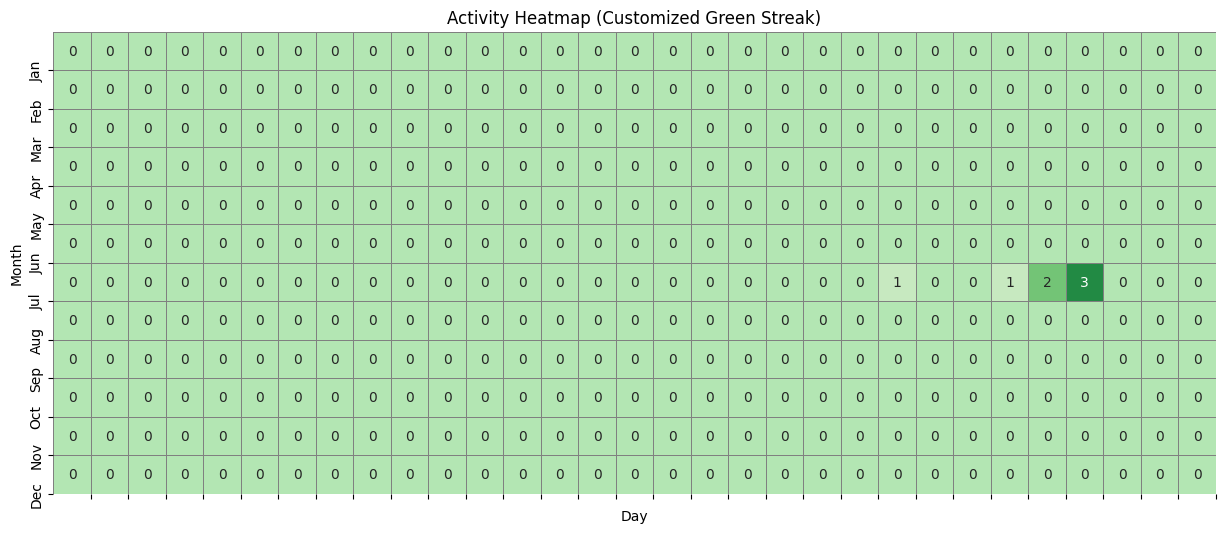

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file with the correct date format
df = pd.read_csv('gymdata.csv', parse_dates=['Date'], dayfirst=True)

# Step 2: Preprocess the data (same as before)
df.set_index('Date', inplace=True)
date_range = pd.date_range(start='01-01-2023', end='31-12-2023')
df = df.reindex(date_range, fill_value=0)

# Step 3: Adjust intensity values based on streak continuity
intensity_values = df['Intensity'].values
current_streak = 0
max_streak = 0

for i in range(len(intensity_values)):
    if intensity_values[i] == 1:
        current_streak += 1
        max_streak = max(max_streak, current_streak)
    else:
        current_streak = 0

    intensity_values[i] = current_streak

# Step 4: Create the Heatmap with the customized color scheme
heatmap_data = df.pivot_table(index=df.index.month, columns=df.index.day, values='Intensity', fill_value=0)

# Custom green color palette with specified intensity levels
cmap = sns.color_palette([(0.7, 0.9, 0.7)] + sns.color_palette("Greens", max_streak))

# Plot the heatmap with the customized color palette and adjust the layout
plt.figure(figsize=(15, 6))  # Wider figure to accommodate the entire year
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='d', linewidths=0.5, linecolor='gray', cbar=False)
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Activity Heatmap (Customized Green Streak)')
plt.xticks(range(1, 32))  # Show all days on the x-axis
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Show month names on the y-axis
plt.show()
